#**Python AI**
**Part 3: Classification**

Section 20 - Naive Bayes

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Data/Breast_cancer_data.csv')
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


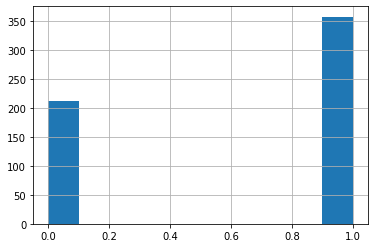

In [2]:
data['diagnosis'].hist()

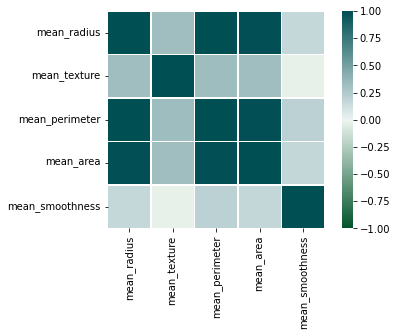

In [3]:
import seaborn as sns
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(500,200,100,30,center='light',as_cmap=True)
sns.heatmap(corr, vmax=1., vmin=-1., cmap=cmap, square=True, linewidths=.2)

In [4]:
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


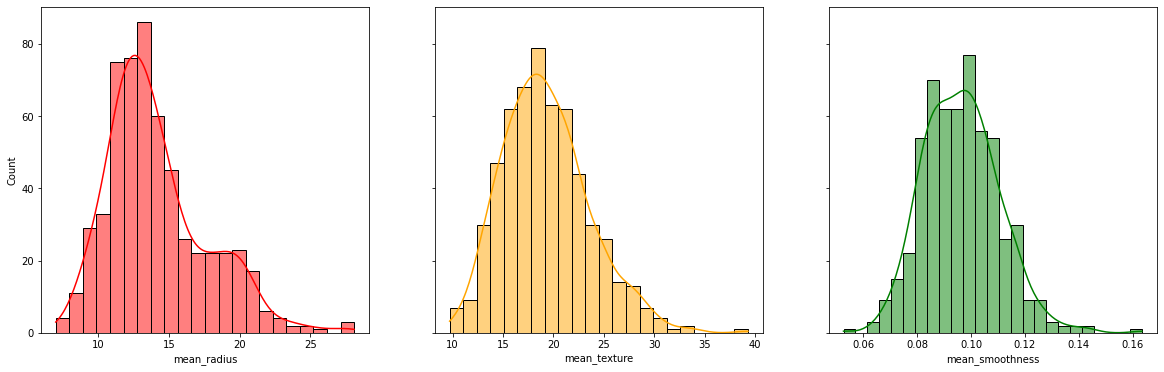

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_texture", kde=True, color='orange')
sns.histplot(data, ax=axes[2], x="mean_smoothness", kde=True, color='green')

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=0)

X_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
X_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

In [7]:
def calculate_prior(y_train):
    prior = []
    count = 0
    for i in y_train:
      if i == 0:
        count += 1
    P0 = count/len(y_train)
    P0 = round(P0,2)
    prior.append(P0)
    P1 = 1-P0
    prior.append(P1)
    return prior

def calculate_likelihood_gaussian(train, feat_name, feat_val, Y, label):
    feat = list(train.columns) 
    train = train[train[Y]==label]
    mean, std = train[feat_name].mean(), train[feat_name].std()
    px_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return px_y

def naive_bayes_gaussian(train, X_test, Y):
    # get feature names
    features = list(train.columns)[:-1]

    # calculate prior
    prior = calculate_prior(y_train)

    Y_pred = []
    # # loop over every data sample
    for x in X_test:
        # calculate likelihood
        labels = sorted(list(train[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(train, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred) 

y_pred = []
y_pred = naive_bayes_gaussian(train, X_test, Y="diagnosis")
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1]


In [8]:
Accuracy = 0
count = 0
for i in range(len(y_pred)):
  if y_pred[i]==y_test[i]:
    count += 1
Accuracy = count/len(y_pred)
print(Accuracy)

0.9122807017543859
